In [1]:
import numpy as np
import os
import skimage
import matplotlib.pyplot as plt

In [2]:
def DigitizeImage(X, nPixels):
    height = np.size(X,0)
    width = np.size(X,1)
    pixel_size = np.floor(min(width/nPixels, height/nPixels))
    
    if(pixel_size > height or pixel_size > width):
        X_digitized = X.copy()
        X_digitized[0:height, 0:width] = np.mean(X)
        print("Warning nPixels is greater than base image resolution")
        return X_digitized
    nSteps_w = int(1 + width / pixel_size)
    nSteps_h = int(1 + height / pixel_size)
    
    X_digitized = X.copy()
    
    
    for i in range(nSteps_h):
        for j in range(nSteps_w):
            start_i = int(i * pixel_size)
            start_j = int(j * pixel_size)
            
            stop_i = min(int((i+1) * pixel_size), height)
            stop_j = min(int((j+1) * pixel_size), width)
            
            X_digitized[start_i:stop_i, start_j:stop_j] = np.mean(X[start_i:stop_i, start_j:stop_j])
    return X_digitized

In [3]:
# Calculate the Cross Entropy of P with respect to Q
def CrossEntropy(P, Q):
    P = np.ndarray.flatten(P)
    Q = np.ndarray.flatten(Q)
    epsilon = 0.00000001
    xEntropy = 0.0
    for i in range(len(P)):
        if(Q[i] == 0):
            xEntropy -= P[i] * np.log2(epsilon)
        else:
            xEntropy -= P[i]* np.log2(Q[i])
    return xEntropy
        

In [4]:
#Calculate percentage overlap between two images (Assumes same size)
def PercentOverlap(X1, X2):
    X_diff = np.abs(np.subtract(X1, X2))
    return np.mean(X_diff)

In [41]:
# Load High Resolution Font
def LoadGlyph(filename):
    fdir = os.getcwd() + "/Glyphs/"
    img = skimage.io.imread(fdir + filename)
    img_bw = skimage.color.colorconv.rgb2gray(img)
    img_matrix = np.asarray(img_bw.data)
    img_binarized = 1.0*(img_matrix > skimage.filters.threshold_otsu(img_matrix))
    return img_binarized


In [51]:
class Glyph:
    name = ""
    image = []
    nPixels = []
    digitizer_XEntropy = []
    percent_overlap = []
    
    def __init__(self, name, image):
        self.image = image
        self.name = name

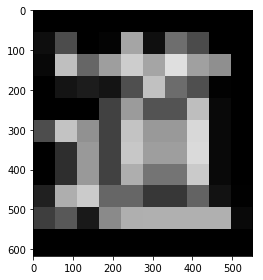

In [58]:
filenames = ['GoogleSans_A.png', 'Dao.png']
glyphs = []
for f in filenames:
    X = LoadGlyph(f)
    X_digitized = DigitizeImage(X, 10)
    skimage.io.imshow(X)
    g = Glyph(f.split('.')[0], X)
    glyphs.append(g)
    skimage.io.imshow(X_digitized)


In [59]:
for g in glyphs:
    g.nPixels = [5, 10, 20, 40, 80, 160, 320] #, 640, 1280]
    g.digitizer_XEntropy = [0] * len(nPixels)
    g.percent_overlap = [0] * len(nPixels)
    for i in range(len(g.nPixels)):
        X_digitized = DigitizeImage(g.image, g.nPixels[i])
        g.digitizer_XEntropy[i] = CrossEntropy(X_digitized, g.image)
        g.percent_overlap[i] = PercentOverlap(X_digitized, g.image)


/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


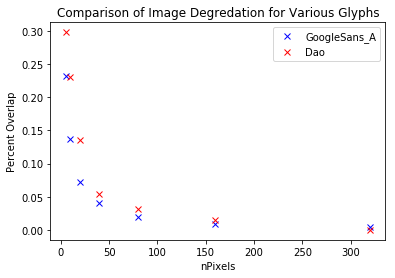

In [61]:
markers = ['bx', 'rx']
for i, g in enumerate(glyphs):
    plt.plot(g.nPixels, g.percent_overlap, markers[i])
plt.xlabel("nPixels")
plt.ylabel("Percent Overlap")
plt.title('Comparison of Image Degredation for Various Glyphs')
plt.legend([g.name for g in glyphs])

Text(0.5, 1.0, 'Comparison of Cross Entropy and Overlap Metricsr = 1.0')

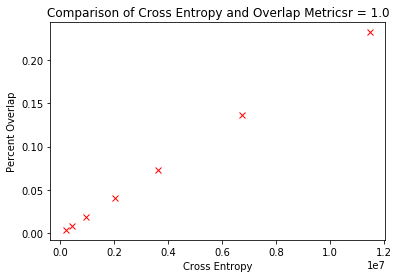

In [62]:
plt.plot(glyphs[0].digitizer_XEntropy, glyphs[0].percent_overlap, 'rx')
plt.xlabel("Cross Entropy")
plt.ylabel("Percent Overlap")

r = np.dot(percent_overlap, digitizer_XEntropy)/(np.linalg.norm(percent_overlap) * np.linalg.norm(digitizer_XEntropy))
plt.title("Comparison of Cross Entropy and Overlap Metrics" + "r = " + str(np.round(r,5)))

In [14]:
tmp

0.9999833043927099

In [ ]:
|